<h1>Предсказание оттока пользователей<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Домашнее-задание.-Решение-конкурса-на-kaggle.com" data-toc-modified-id="Домашнее-задание.-Решение-конкурса-на-kaggle.com-0">Домашнее задание. Решение конкурса на kaggle.com</a></span></li><li><span><a href="#Первая-часть.-Исследование" data-toc-modified-id="Первая-часть.-Исследование-1">Первая часть. Исследование</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1">Загрузка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.2">Анализ данных</a></span></li><li><span><a href="#Применение-линейных-моделей" data-toc-modified-id="Применение-линейных-моделей-1.3">Применение линейных моделей</a></span></li><li><span><a href="#Применение-градиентного-бустинга-(2-балла)" data-toc-modified-id="Применение-градиентного-бустинга-(2-балла)-1.4">Применение градиентного бустинга (2 балла)</a></span></li></ul></li><li><span><a href="#Предсказания" data-toc-modified-id="Предсказания-2">Предсказания</a></span></li></ul></div>

# Домашнее задание. Решение конкурса на kaggle.com #

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

# Первая часть. Исследование

In [108]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score

## Загрузка данных 

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [131]:
data_train = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посотрим на 5 случайных строк

In [132]:
data_train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3385,26,75.00,1908.35,Male,0,No,No,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),0
2449,43,24.45,993.15,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
3259,1,49.05,49.05,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,0
3309,1,44.55,44.55,Male,0,Yes,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,0
139,65,110.35,7246.15,Male,1,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0


Выведем информацию о датасете



In [133]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Мы видим что в тип столбца `TotalSpent` object, а не float. Поменяем тип столбца на float, заменив неподходящие значения на Nan

In [134]:
data_train.TotalSpent = pd.to_numeric(data_train.TotalSpent, errors='coerce')

Проверим пропуски в таблице

In [135]:
data_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Заменим пропущенные значения на 0

In [136]:
data_train.TotalSpent = data_train.TotalSpent.fillna(0)

In [137]:
data_train.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.159409,0.262022
std,24.550326,30.176464,2269.049195,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [138]:
# Проверим датасет на наличие явных дубликатов
data_train.duplicated().sum()

14

In [139]:
data_train = data_train.drop_duplicates()

## Анализ данных

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

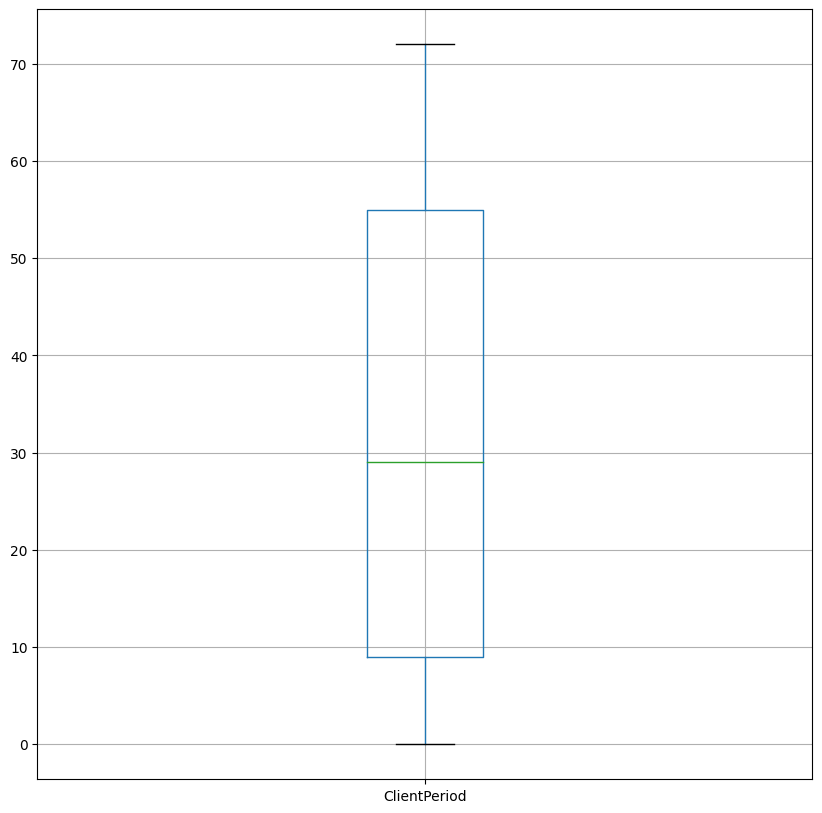

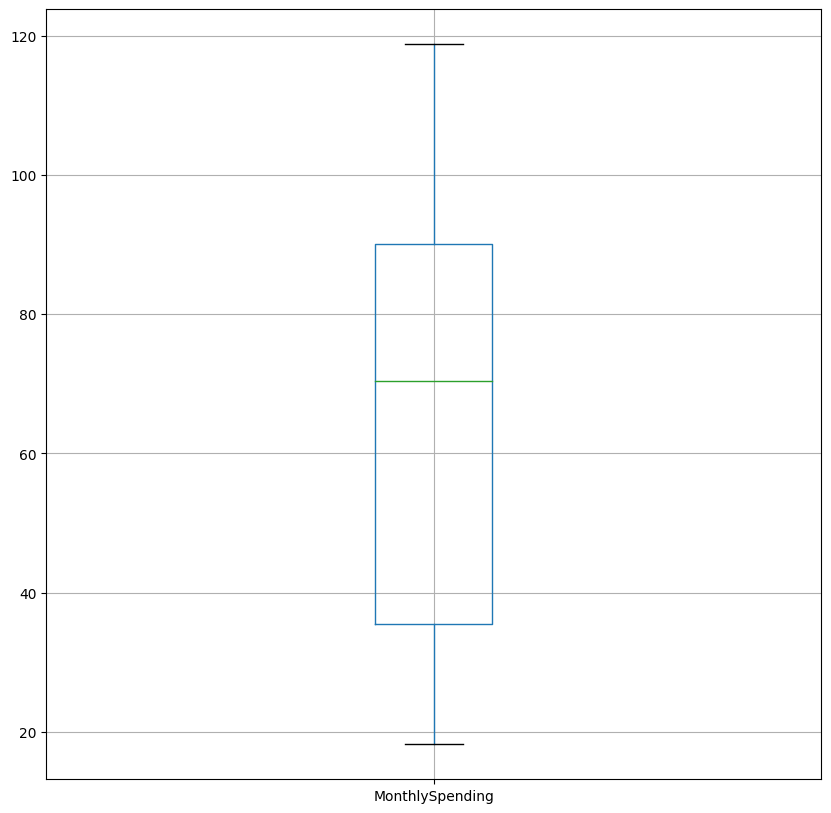

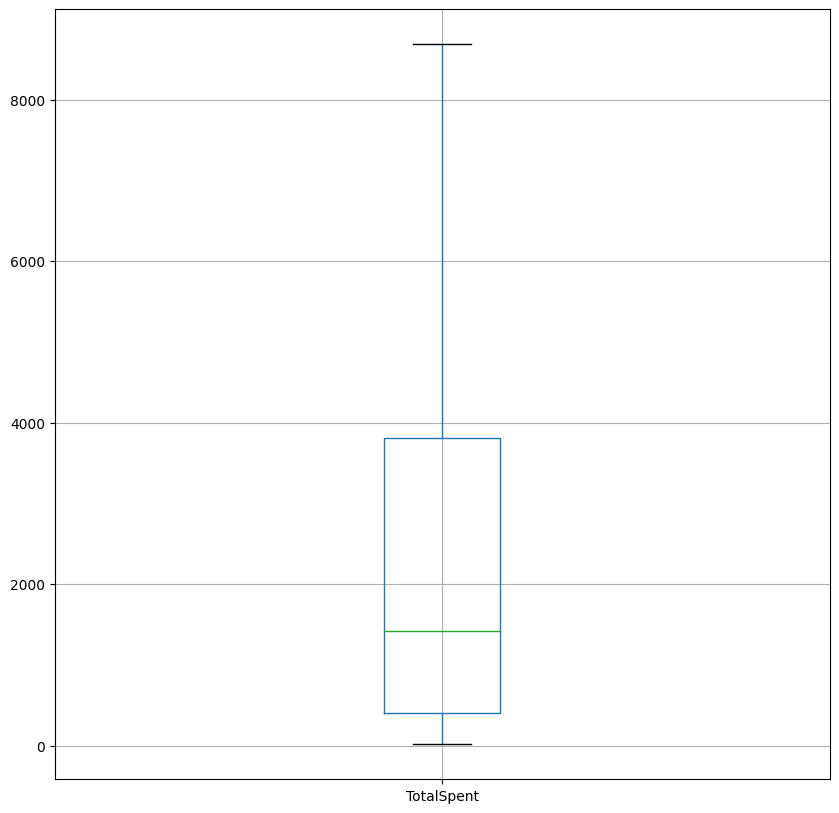

In [22]:
# Изучим диаграммы размаха в поисках аномалий
for row in num_cols:
  data_train.boxplot(column=row, figsize=(10,10))
  plt.show()

Распределение признака: Sex
Male      2647
Female    2621
Name: Sex, dtype: int64 



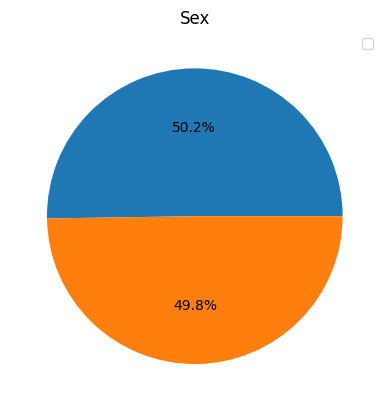

Распределение признака: IsSeniorCitizen
0    4427
1     841
Name: IsSeniorCitizen, dtype: int64 



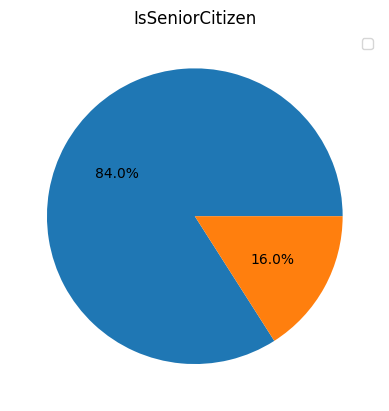

Распределение признака: HasPartner
No     2691
Yes    2577
Name: HasPartner, dtype: int64 



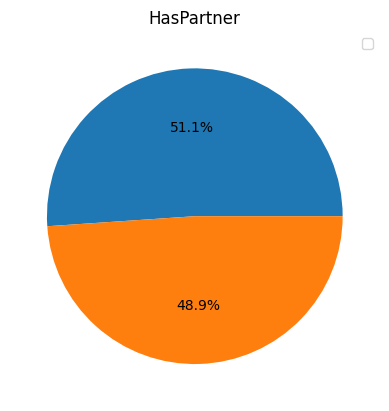

Распределение признака: HasChild
No     3662
Yes    1606
Name: HasChild, dtype: int64 



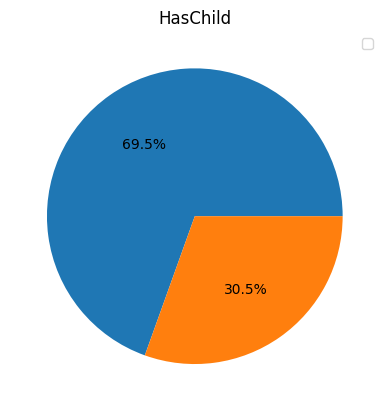

Распределение признака: HasPhoneService
Yes    4747
No      521
Name: HasPhoneService, dtype: int64 



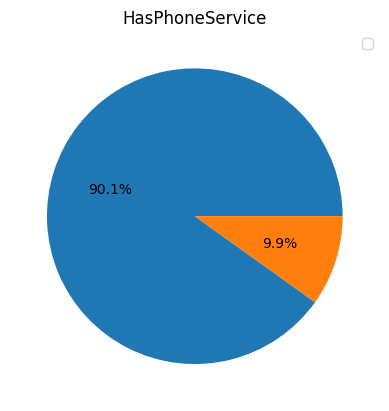

Распределение признака: HasMultiplePhoneNumbers
No                  2497
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 



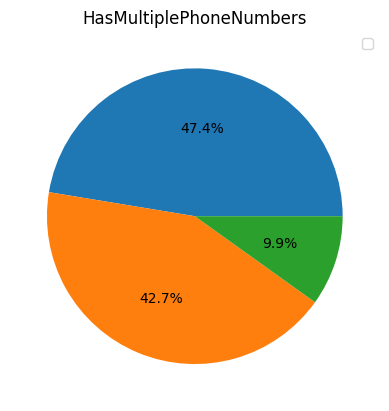

Распределение признака: HasInternetService
Fiber optic    2335
DSL            1798
No             1135
Name: HasInternetService, dtype: int64 



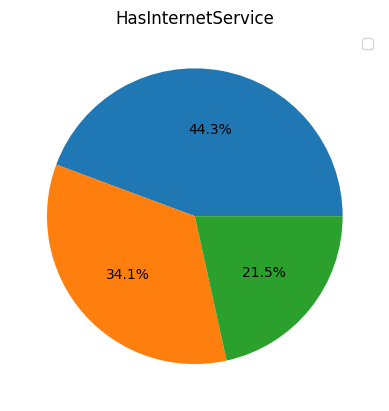

Распределение признака: HasOnlineSecurityService
No                     2604
Yes                    1529
No internet service    1135
Name: HasOnlineSecurityService, dtype: int64 



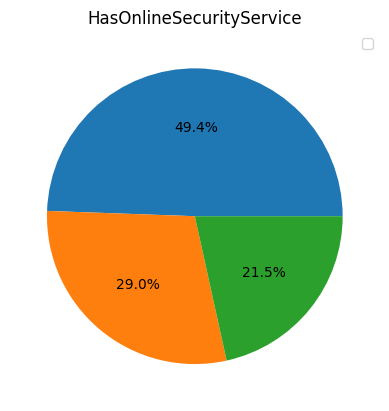

Распределение признака: HasOnlineBackup
No                     2324
Yes                    1809
No internet service    1135
Name: HasOnlineBackup, dtype: int64 



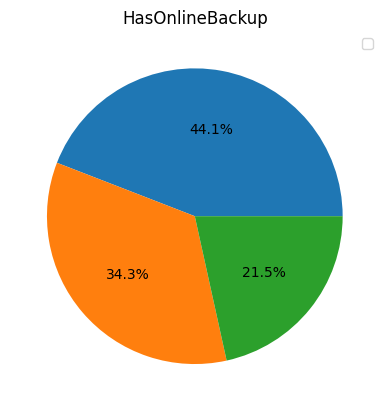

Распределение признака: HasDeviceProtection
No                     2309
Yes                    1824
No internet service    1135
Name: HasDeviceProtection, dtype: int64 



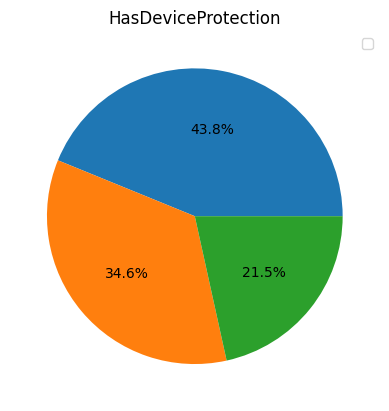

Распределение признака: HasTechSupportAccess
No                     2596
Yes                    1537
No internet service    1135
Name: HasTechSupportAccess, dtype: int64 



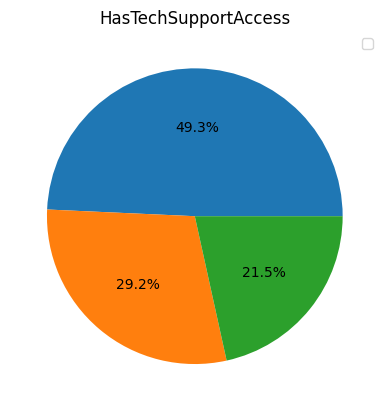

Распределение признака: HasOnlineTV
No                     2091
Yes                    2042
No internet service    1135
Name: HasOnlineTV, dtype: int64 



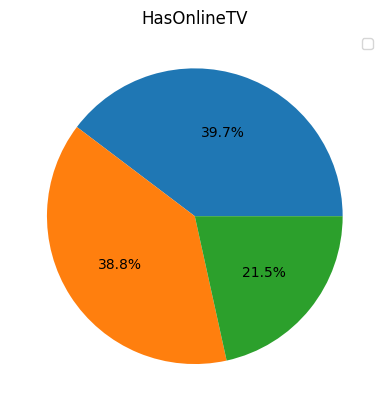

Распределение признака: HasMovieSubscription
No                     2073
Yes                    2060
No internet service    1135
Name: HasMovieSubscription, dtype: int64 



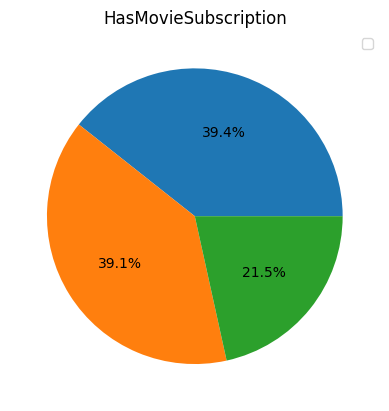

Распределение признака: HasContractPhone
Month-to-month    2906
Two year          1280
One year          1082
Name: HasContractPhone, dtype: int64 



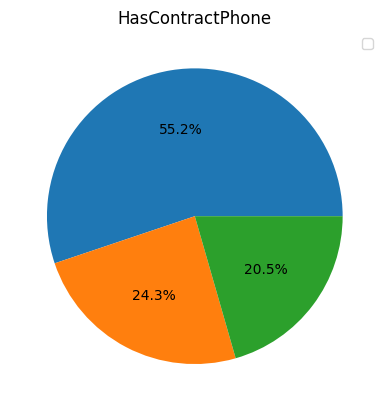

Распределение признака: IsBillingPaperless
Yes    3140
No     2128
Name: IsBillingPaperless, dtype: int64 



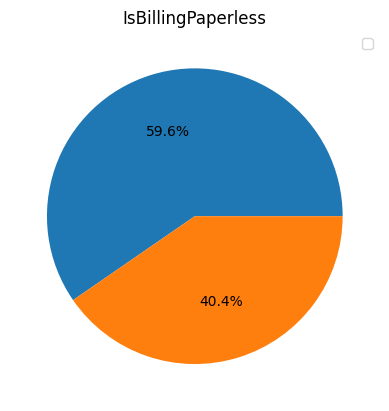

Распределение признака: PaymentMethod
Electronic check             1780
Mailed check                 1186
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: PaymentMethod, dtype: int64 



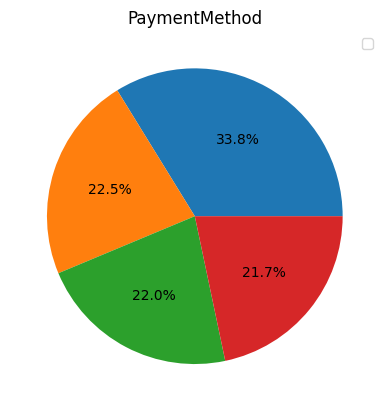

In [34]:
# Посмотрим на распределения категориальных признаков
for row in cat_cols:
  print('Распределение признака:', row)
  print(data_train[row].value_counts(), '\n')
  plt.title(row)
  plt.legend()
  plt.pie(data_train[row].value_counts(), autopct='%.1f%%')
  plt.show()

In [121]:
# Посмотрим на распределение в целевом признаке
data_train['Churn'].value_counts()

0    3894
1    1374
Name: Churn, dtype: int64

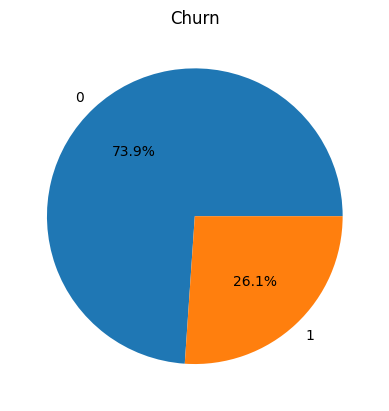

In [127]:
plt.pie(data_train.Churn.value_counts(), autopct='%.1f%%', labels=data.Churn.value_counts().index)
plt.title('Churn')
plt.show()

Классы несбалансированные.

## Применение линейных моделей

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [44]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

В обучении моделей будем использовать кроссвалидацию, поэтому нам не нужно делить нашу выборку на тренировочную и тестовую

Создадим переменную `target` с целевым признаком и переменную с `features` с остальными признаками

In [106]:
features=data_train.drop(['Churn'], axis=1)
target=data_train['Churn']

Напишем код для кодирования и стандартизации признаков для логистической регрессии и случайного леса

In [62]:
transformer_log = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='error'),
        cat_cols
    ),
    (
        StandardScaler(),
        num_cols
    )
)



Создадим и обучим модель Логистичекой регерессии




In [63]:
model_lr = LogisticRegression(class_weight='balanced')

In [109]:
pipline_lr = make_pipeline(transformer_log, model_lr)
parametrs_lr = { 'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'logisticregression__max_iter': range (6,15,2),
              }
lr = GridSearchCV(pipline_lr, param_grid=parametrs_lr, cv=3, scoring='roc_auc')
lr.fit(features, target)
auc_roc_lr = lr.best_score_
auc_roc_lr_params=lr.best_params_
# лучшее значение auc_roc на кросс-валидации
print(f'best_score: {auc_roc_lr}')
# лучшие гиперпараметры
print(f'best_params: {auc_roc_lr_params}')

best_score: 0.8421193842054623
best_params: {'logisticregression__C': 1, 'logisticregression__max_iter': 14}


**roc_auc** лучшей модели равен **0.842** при следующих гипперпараметрах:
  'logisticregression__C' = 1
  'logisticregression__max_iter': 14



## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

В обучении моделей будем использовать кроссвалидацию, поэтому нам не нужно делить нашу выборку на тренировочную и тестовую

In [69]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.4 MB/s eta 0:00:00


In [70]:
from catboost import CatBoostClassifier, Pool,cv

In [120]:
train_dataset = Pool(features, target, cat_features=cat_cols)
#test_dataset = Pool(features_test, target_test, cat_features=cat_cols)
model_cat = CatBoostClassifier(verbose=200,
                               eval_metric='AUC:hints=skip_train~false', auto_class_weights = 'Balanced')
grid_cat = {'iterations': range(100,501,100),
        'learning_rate': [0.2, 0.3, 0.4, 0.5],
        'depth': [2, 4, 6],
         'l2_leaf_reg': [5,7,9,11] }
model_cat.grid_search(grid_cat, train_dataset, cv=5)

model_cat_auc = model_cat.get_best_score()
print(model_cat_auc)

0:	learn: 0.7613932	test: 0.7799883	best: 0.7799883 (0)	total: 7.32ms	remaining: 724ms
99:	learn: 0.8583057	test: 0.8605158	best: 0.8614191 (55)	total: 934ms	remaining: 0us

bestTest = 0.8614190687
bestIteration = 55

0:	loss: 0.8614191	best: 0.8614191 (0)	total: 959ms	remaining: 3m 49s
0:	learn: 0.7613932	test: 0.7799883	best: 0.7799883 (0)	total: 9.7ms	remaining: 960ms
99:	learn: 0.8631607	test: 0.8570942	best: 0.8608052 (58)	total: 849ms	remaining: 0us

bestTest = 0.8608052281
bestIteration = 58

1:	loss: 0.8608052	best: 0.8614191 (0)	total: 1.81s	remaining: 3m 36s
0:	learn: 0.7613932	test: 0.7799883	best: 0.7799883 (0)	total: 9.7ms	remaining: 961ms
99:	learn: 0.8655820	test: 0.8530797	best: 0.8559202 (32)	total: 544ms	remaining: 0us

bestTest = 0.8559201774
bestIteration = 32

2:	loss: 0.8559202	best: 0.8614191 (0)	total: 2.37s	remaining: 3m 6s
0:	learn: 0.7613932	test: 0.7799883	best: 0.7799883 (0)	total: 5.95ms	remaining: 590ms
99:	learn: 0.8709495	test: 0.8454966	best: 0.8520551

In [122]:
# Вывыдем на экран значения лучших параметры модели
model_cat_auc = model_cat.get_best_score()
model_cat_best = model_cat.get_params()
print(model_cat_auc)
print(model_cat_best)

{'learn': {'Logloss': 0.4317598155215272, 'AUC': 0.8790798219782011}}
{'verbose': 200, 'auto_class_weights': 'Balanced', 'eval_metric': 'AUC:hints=skip_train~false', 'depth': 2, 'learning_rate': 0.5, 'l2_leaf_reg': 7, 'iterations': 200}


In [123]:
# Выведем значение метрики roc-auc
model_cat_auc = model_cat_auc['learn']['AUC']
print('Roc-auc лучшей модели =', model_cat_auc)

Roc-auc лучшей модели = 0.8790798219782011


Параметры лучшей модели:

  'auto_class_weights': 'Balanced',

  'depth': 2,

  'learning_rate': 0.5,

  'l2_leaf_reg': 7,

  'iterations': 200

# Предсказания

In [124]:
test = pd.read_csv('./test.csv')


In [125]:
best_model = CatBoostClassifier(random_state=270323, verbose=200, eval_metric='AUC:hints=skip_train~false',
                                  depth=2, iterations=200, learning_rate=0.5, l2_leaf_reg=7)
best_model.fit(features,target, cat_features=cat_cols)
predict=best_model.predict(test)
probabilities_valid = best_model.predict_proba(test)

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(test)[:,1]
submission.to_csv('./my_submission_test_4.csv', index=False)

0:	learn: 0.7435012	total: 7.16ms	remaining: 1.42s
199:	learn: 0.8761992	total: 1.38s	remaining: 0us


Лучшее решение отправьте в Stepik.

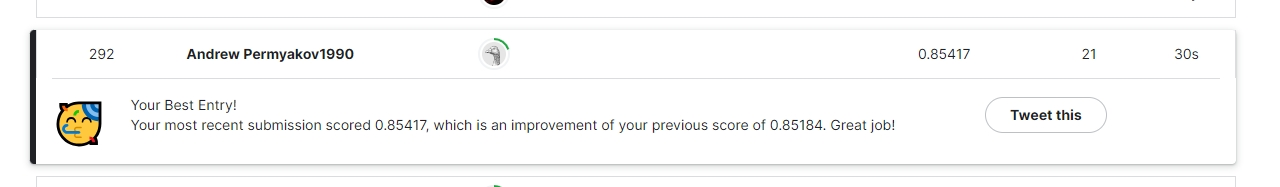